Epoch [100/1000], Loss: 5.1483
Epoch [200/1000], Loss: 4.3309
Epoch [300/1000], Loss: 4.0288
Epoch [400/1000], Loss: 3.9171
Epoch [500/1000], Loss: 3.8758
Epoch [600/1000], Loss: 3.8606
Epoch [700/1000], Loss: 3.8549
Epoch [800/1000], Loss: 3.8528
Epoch [900/1000], Loss: 3.8521
Epoch [1000/1000], Loss: 3.8518


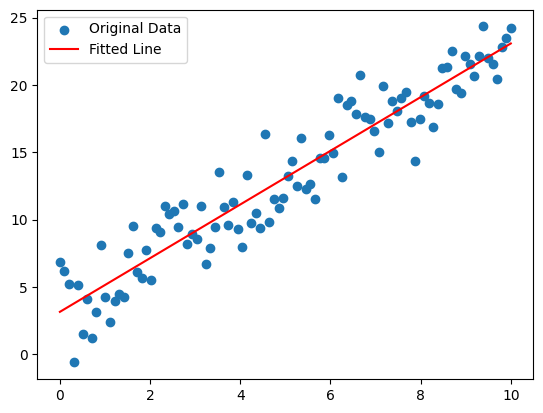

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. 生成数据：y = 2 * x + 3 + 噪声
torch.manual_seed(42)
x_train = torch.linspace(0, 10, 100).reshape(-1, 1)  # 100个样本，x值在0到10之间
y_train = 2 * x_train + 3 + torch.randn(100, 1) * 2  # 添加一些噪声

# 2. 定义线性模型
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 输入和输出都是1维

    def forward(self, x):
        return self.linear(x)

# 实例化模型
model = LinearRegressionModel()

# 3. 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器，学习率为0.01

# 4. 训练模型
epochs = 1000
for epoch in range(epochs):
    model.train()  # 切换到训练模式
    optimizer.zero_grad()  # 梯度清零

    # 前向传播
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)  # 计算损失

    # 反向传播
    loss.backward()
    optimizer.step()  # 更新参数

    # 打印训练进度
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# 5. 绘制拟合结果
model.eval()  # 切换到评估模式
with torch.no_grad():
    y_pred = model(x_train)

plt.scatter(x_train, y_train, label="Original Data")
plt.plot(x_train, y_pred, color="red", label="Fitted Line")
plt.legend()
plt.show()
